In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"] = (df["class"] == "g").astype(int) # convertir les valeurs en entiérs

In [4]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


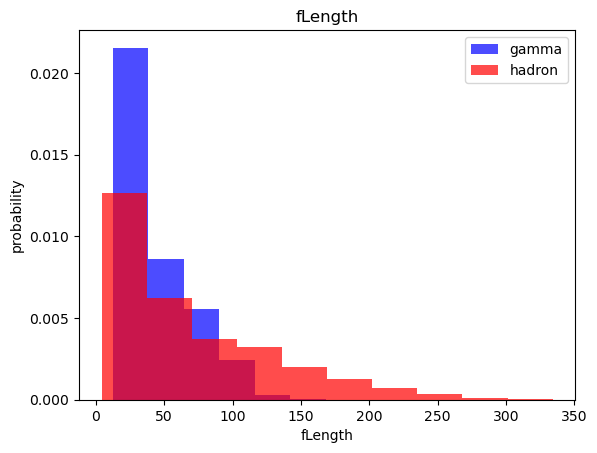

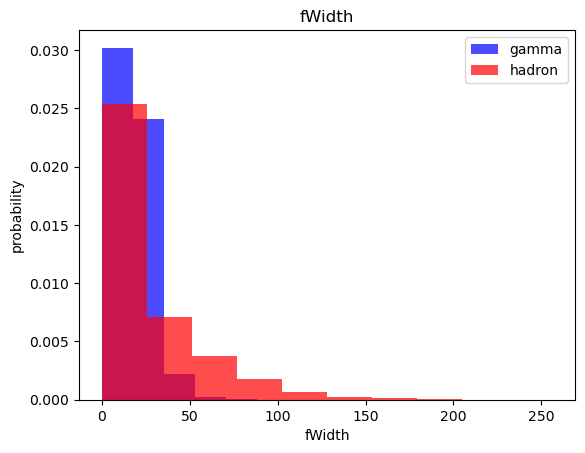

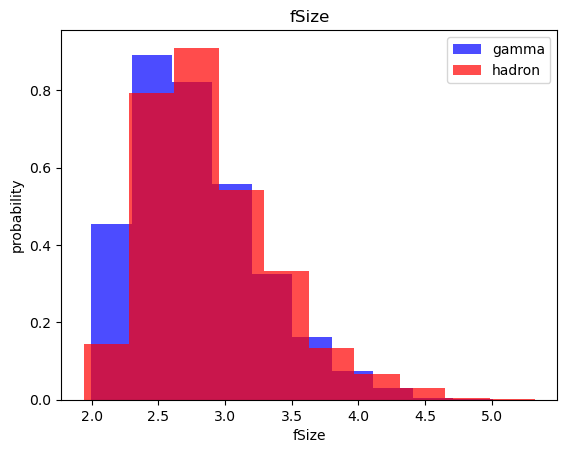

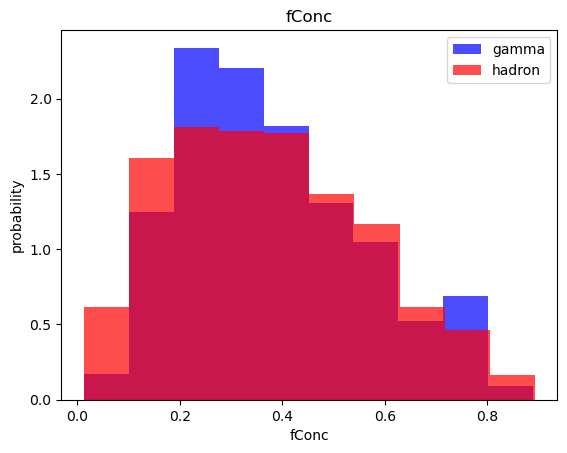

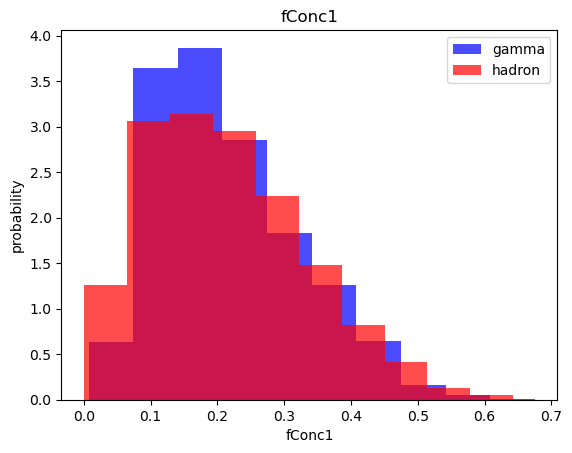

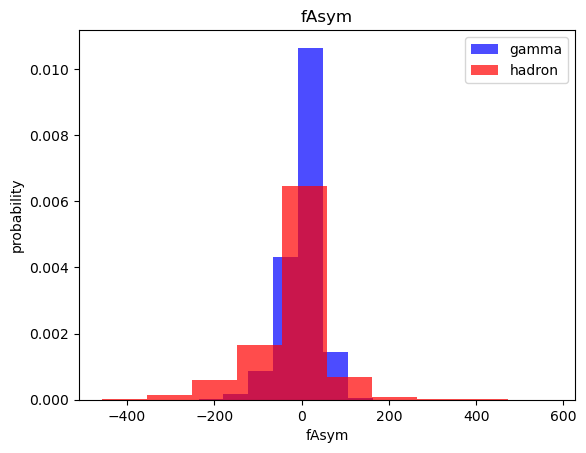

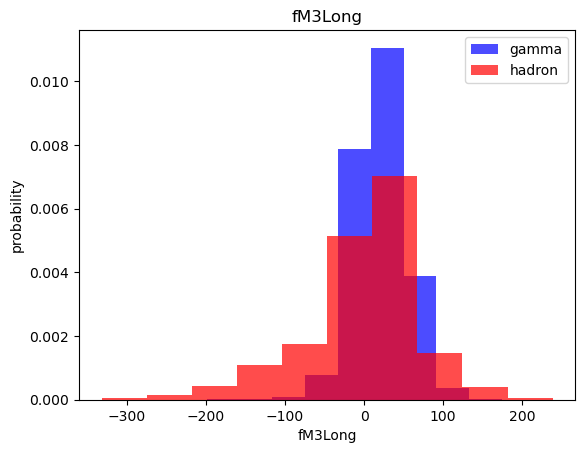

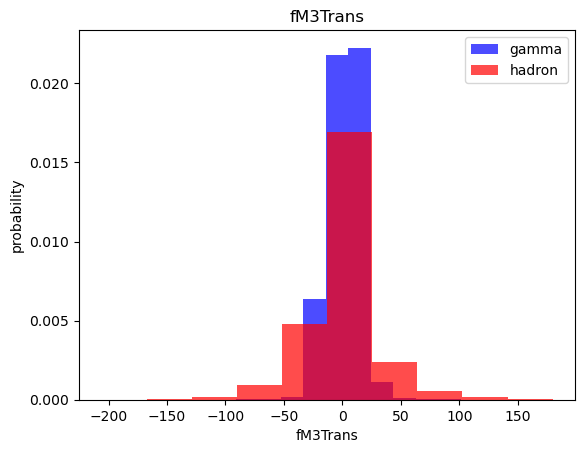

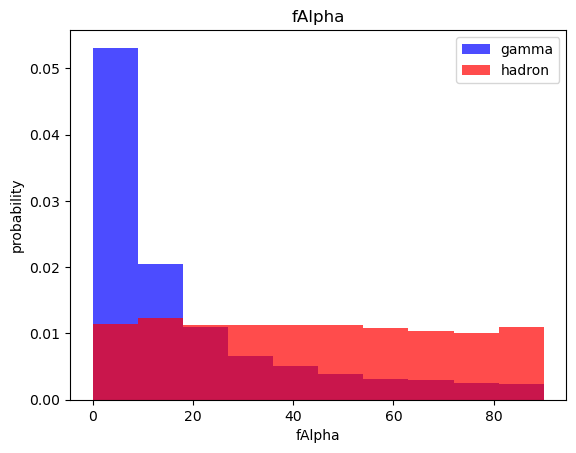

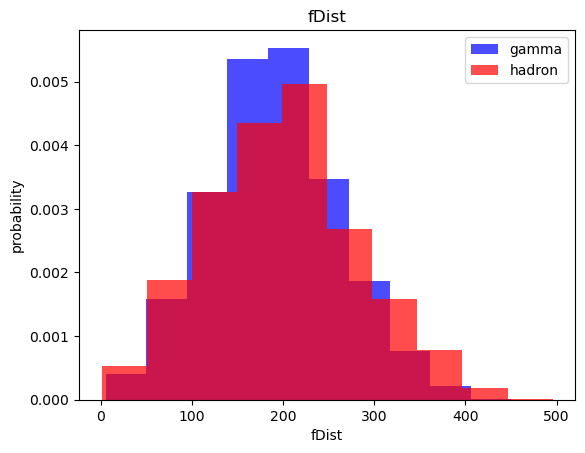

In [5]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

### Train, validation, test datasets

In [6]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values
    
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    
    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y)
        
    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [9]:
sum(y_train == 1), sum(y_train == 0)

(7407, 7407)

### KNN algorithm

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [12]:
y_predict = knn_model.predict(X_test)

C:\Users\lechiffre\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [13]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.67      0.72      1347
           1       0.83      0.88      0.86      2457

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



### Naive Bayer

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [16]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1347
           1       0.73      0.90      0.81      2457

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



### Log Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [19]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71      1347
           1       0.84      0.82      0.83      2457

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



### Neural Net

In [23]:
import tensorflow as tf

In [25]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [28]:
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [29]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy',
                metrics=['accuracy'])

In [31]:
history = nn_model.fit(
    X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0
)

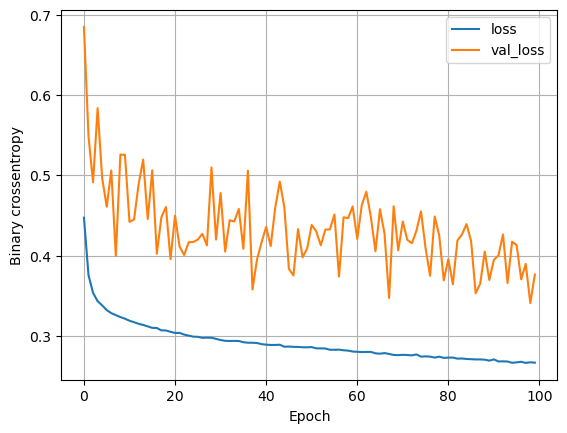

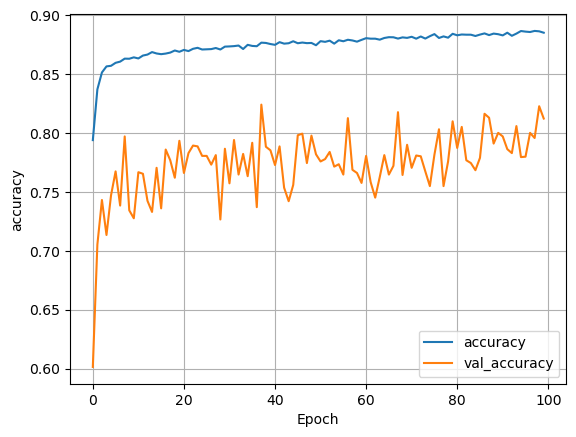

In [32]:
plot_loss(history)
plot_accuracy(history)